initial velocity = 30 m/s
c = 0.001225 Ns^2/m^3
mass = 0.145 kg
theta = 50.0 degrees
g = 9.80665 m/s^2


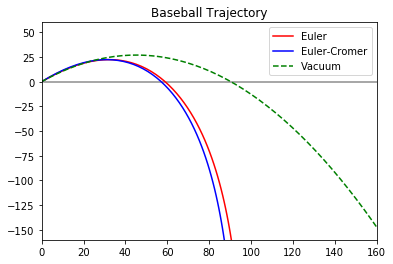

dt = 0.2  sec
x(0), y(0) = 0.0 ,  0.0  m
vx(0), vy(0) = 19.28 ,  22.98  m/s
Quadratic Range - Euler = 60.76  m
Quadratic Range - Euler-Cromer = 58.83  m
Vacuum Range = 92.56  m


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Set constants
c = .001225
m = .145
g = 9.80665
# Set initial velocity and launch angle
th = np.pi*.27777630527
v0 = 30
# Set initial and final time and number of steps
t0 = 0
tf = 10
steps = 50
# Calculate time step size, dt
dt= (tf-t0)/steps

t = np.arange(t0, tf, steps)
# Make some arrays to hold calculated values if ends in e its euler if c its cromer
vxe = np.zeros(steps+1)
vye = np.zeros(steps+1)
xe = np.zeros(steps+1)
ye = np.zeros(steps+1)
vxc = np.zeros(steps+1)
vyc = np.zeros(steps+1)
xc = np.zeros(steps+1)
yc =np.zeros(steps+1)

xa = np.zeros(steps+1)
ya = np.zeros(steps+1)

# Make a line for ground level
lx = np.arange(1,1000,10)
ly = np.zeros(100)

# Set initial component velocities to the proper value
vxe[0] = v0*np.cos(th)
vye[0] = v0*np.sin(th)
vxc[0] = v0*np.cos(th)
vyc[0] = v0*np.sin(th)
# for loop to iterate through the calcs

## Euler
for i in range(0, steps):
    vxe[i+1] = (-c/m)*(vxe[i]**2 + vye[i]**2)**(1/2)*vxe[i]*dt + vxe[i]#quadratic
    xe[i+1] = vxe[i]*dt + xe[i]#linear
    vye[i+1] = -g*dt + (-c/m)*(vxe[i]**2 + vye[i]**2)**(1/2)*vye[i]*dt + vye[i]#quadratic
    ye[i+1] = vye[i]*dt + ye[i]#linear
    
## Euler-Cromer
## Take Euler, change x position calc to use velocity current step rather than last step!!!
## This method follows slope more accurately and is useful when slope is sinusiodal 
for i in range(0, steps):
    vxc[i+1] = (-c/m)*(vxc[i]**2 + vyc[i]**2)**(1/2)*vxc[i]*dt + vxc[i]#quadratic
    xc[i+1] = vxc[i+1]*dt + xc[i]##this is where you see the difference linear
    vyc[i+1] = -g*dt + (-c/m)*(vxc[i]**2 + vyc[i]**2)**(1/2)*vyc[i]*dt + vyc[i]#quadratic
    yc[i+1] = vyc[i]*dt + yc[i]#linear
    
## Vacuum - use analytical solution
for i in range(0, steps+1):
    xa[i] = v0*i*dt*np.cos(th)
    ya[i] = v0*i*dt*np.sin(th) - 0.5*g*(i*dt)**2
    
    

p, = np.where(ye<0)
q, = np.where(yc<0)
r, = np.where(ya<0)

Rq = xe[p]
Rc = xc[q]
Ra = xa[r]
# Print input variables
print('initial velocity =', v0, 'm/s')
print('c =', c, 'Ns^2/m^3')
print('mass =', m, 'kg')
print('theta =', round(th*57.2958, 2), 'degrees')
print('g =', g, 'm/s^2')

# Plot Labels
plt.plot(lx,ly, color='0.55')
plt.plot( xe, ye, 'r-', label='Euler')
plt.plot( xc, yc, 'b-', label='Euler-Cromer')
plt.plot( xa, ya, 'g--', label='Vacuum')
plt.axis([0, 160, -160, 60])
plt.title('Baseball Trajectory')
plt.legend()
plt.show()

# Print output stuff
print('dt =', dt, ' sec')
print('x(0), y(0) =', xe[0],', ', ye[0], ' m')
print('vx(0), vy(0) =', round(vxe[0], 2),', ', round(vye[0], 2), ' m/s')

# Ranges
print('Quadratic Range - Euler =', round(Rq[0], 2), ' m')
print('Quadratic Range - Euler-Cromer =', round(Rc[0], 2), ' m')
print('Vacuum Range =', round(Ra[0], 2), ' m')